#### Create visualizations using Matplotib, Seaborn and Folium

Importing Required Libraries

In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium

Importing data

In [3]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv")

TASK 1.1: Develop a Line chart using the functionality of pandas to show how automobile sales fluctuate from year to year¶

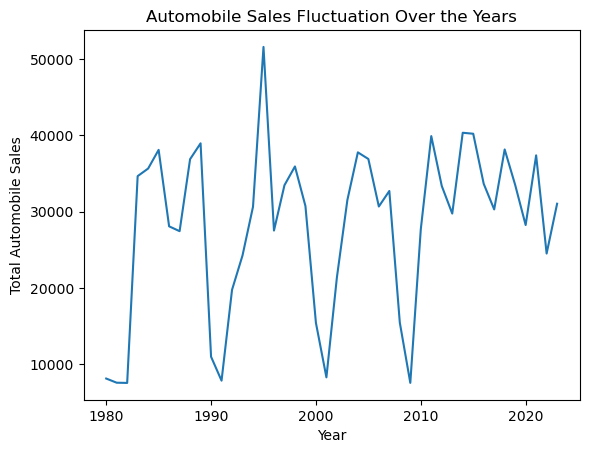

In [5]:
# 1. Calculate the total sales for each year
yearly_sales = df.groupby('Year')['Automobile_Sales'].sum()

# 2. Plot the line chart
yearly_sales.plot(kind='line')
plt.title('Automobile Sales Fluctuation Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Automobile Sales')
plt.show()

Line_Plot_1.png

C:\Users\a12u\AppData\Local\Temp\ipykernel_30164\3657670246.py:43: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


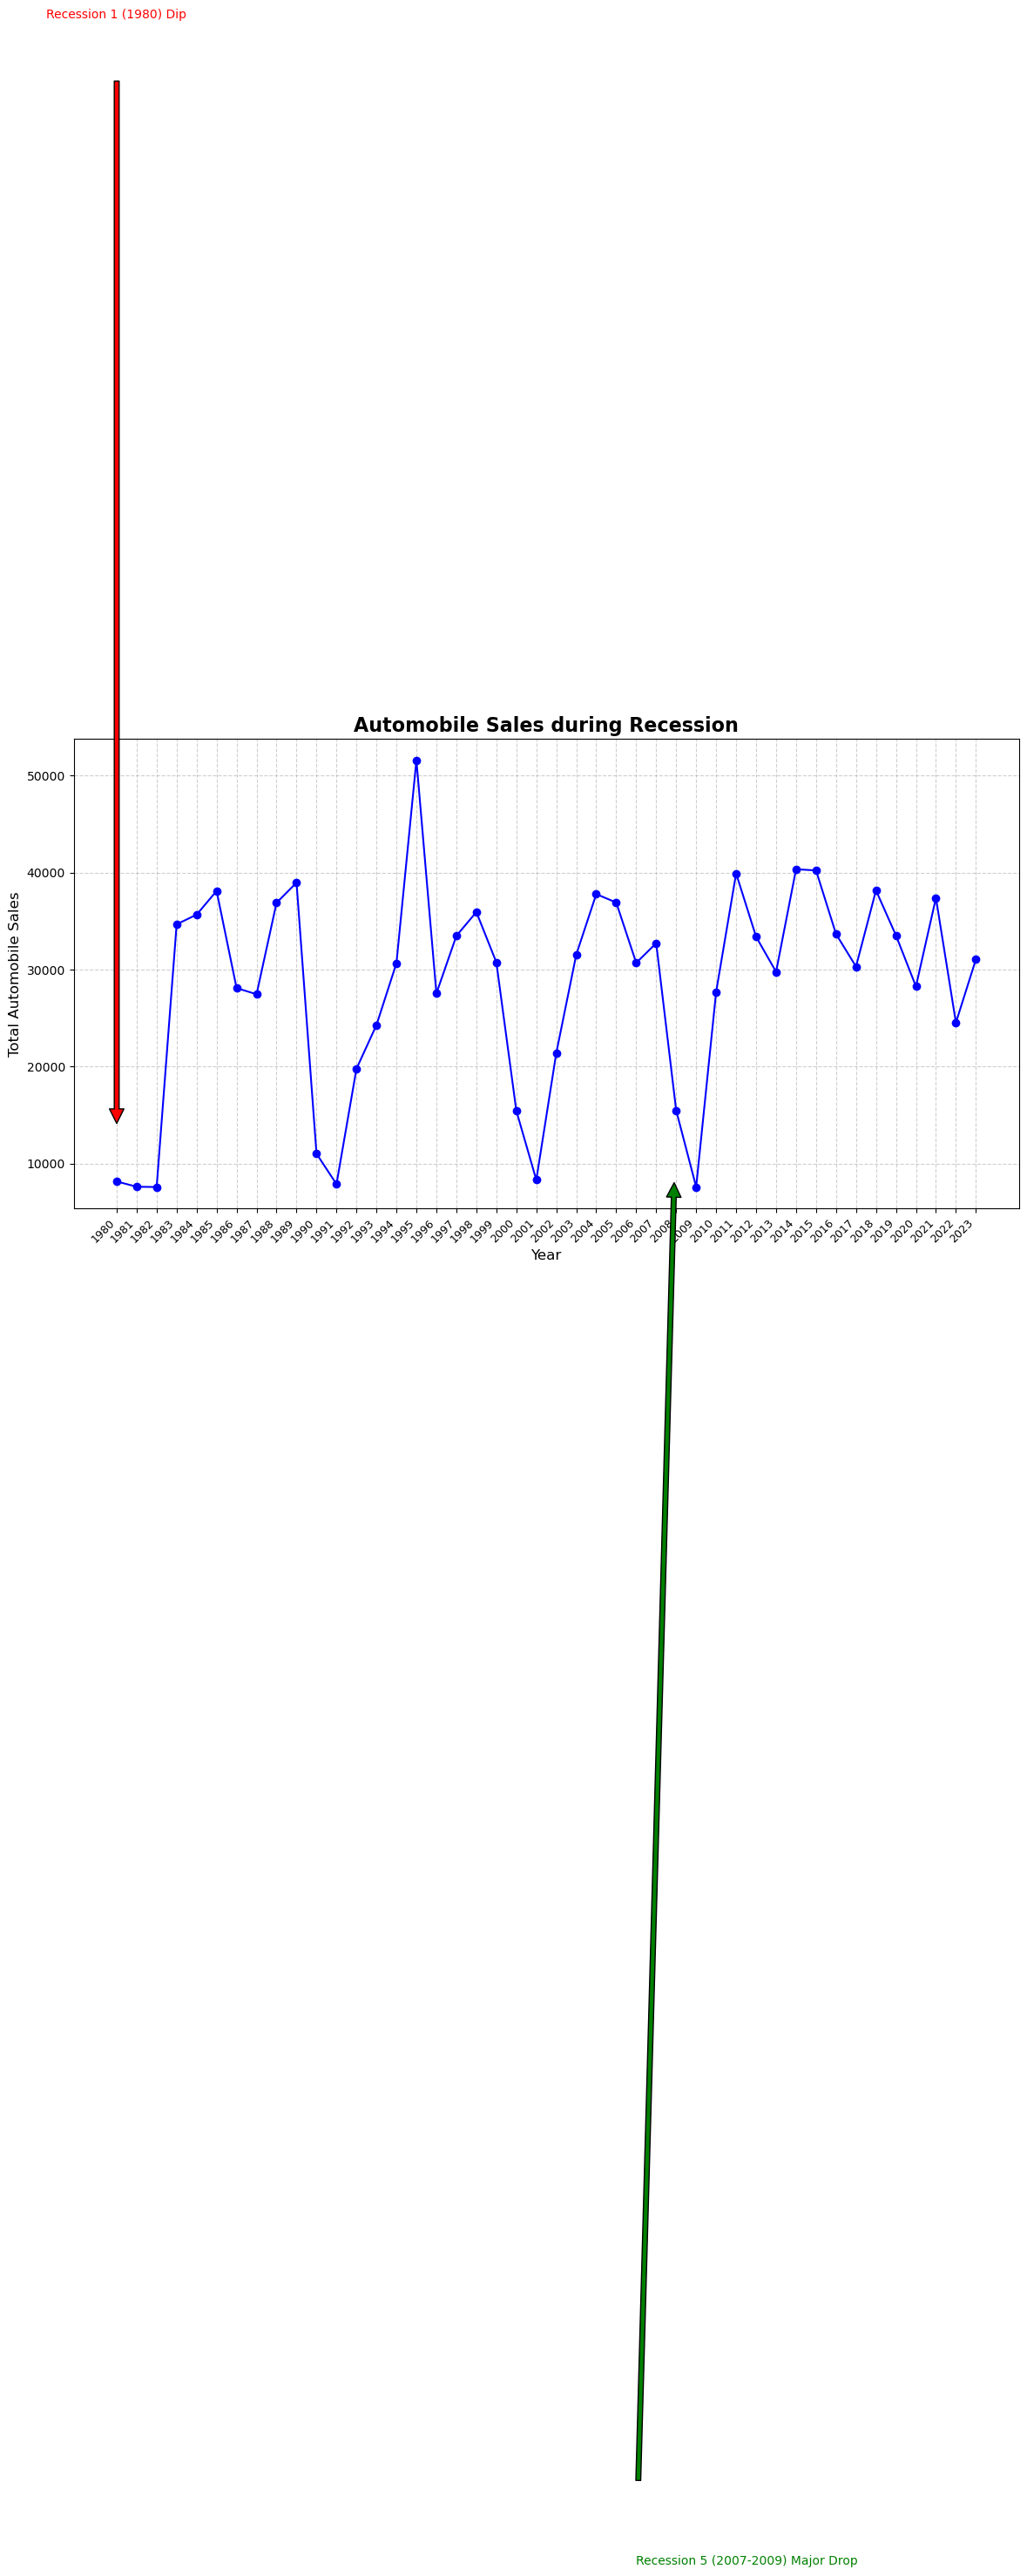

In [6]:
# Assuming the necessary libraries (pandas, matplotlib.pyplot) and the DataFrame 'df' are already loaded.

# 1. Prepare the data (Calculate yearly sales)
yearly_sales_df = df.groupby('Year')['Automobile_Sales'].sum().reset_index()
all_years = yearly_sales_df['Year'].tolist()

# Define annotation points
sales_1980 = yearly_sales_df[yearly_sales_df['Year'] == 1980]['Automobile_Sales'].iloc[0]
sales_2008 = yearly_sales_df[yearly_sales_df['Year'] == 2008]['Automobile_Sales'].iloc[0]

# 2. Create the plot with all customizations
plt.figure(figsize=(14, 7))
plt.plot(yearly_sales_df['Year'], yearly_sales_df['Automobile_Sales'], marker='o', linestyle='-', color='b')

# Set Ticks for all years
plt.xticks(all_years, rotation=45, ha='right', fontsize=9)

# Add Annotations
plt.annotate(
    'Recession 1 (1980) Dip',
    xy=(1980, sales_1980),
    xytext=(1980, sales_1980 + 120000), 
    arrowprops=dict(facecolor='red', shrink=0.05),
    horizontalalignment='center',
    fontsize=10,
    color='red'
)
plt.annotate(
    'Recession 5 (2007-2009) Major Drop',
    xy=(2008, sales_2008),
    xytext=(2006, sales_2008 - 150000), 
    arrowprops=dict(facecolor='green', shrink=0.05),
    horizontalalignment='left',
    fontsize=10,
    color='green'
)

# Set the Title
plt.title('Automobile Sales during Recession', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Automobile Sales', fontsize=12) 
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

TASK 1.2: Plot different lines for categories of vehicle type and analyse the trend to answer the question Is there a noticeable difference in sales trends between different vehicle types during recession periods?

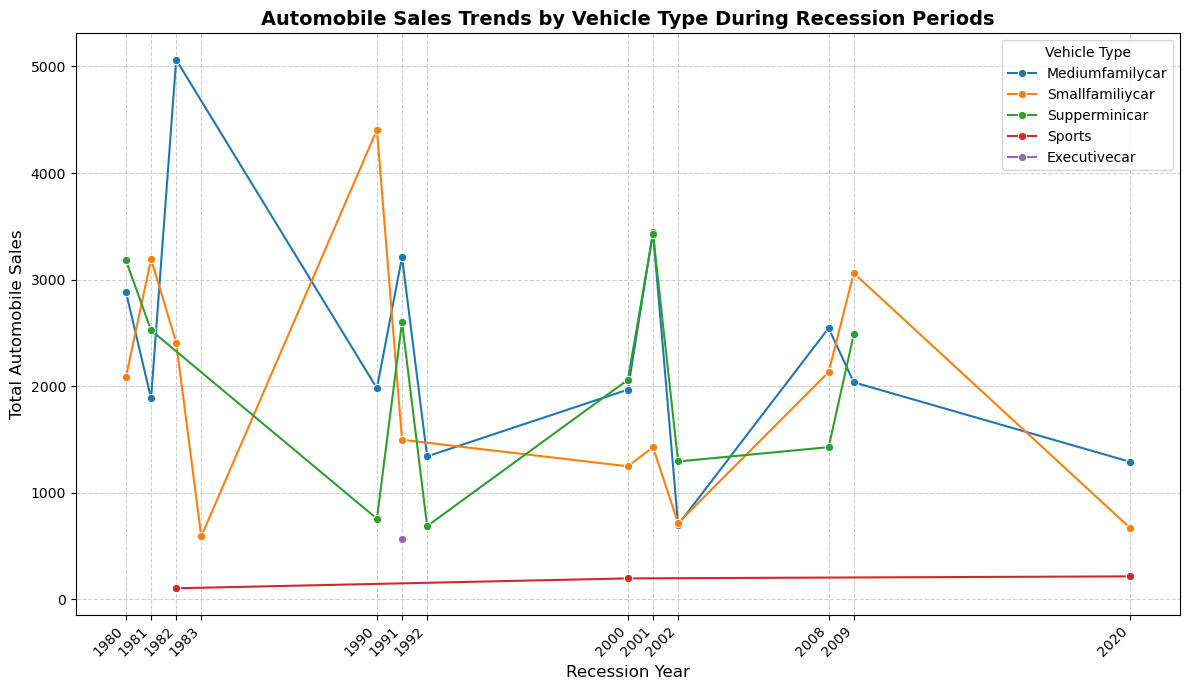

In [7]:
# 1. Filter data for recession periods (Recession == 1)
recession_data = df[df['Recession'] == 1]

# 2. Group the data by Year and Vehicle_Type and sum the Automobile_Sales
yearly_recession_sales_by_type = recession_data.groupby(['Year', 'Vehicle_Type'])['Automobile_Sales'].sum().reset_index()

# --- Plotting ---

plt.figure(figsize=(12, 7))

# Create the multi-line chart using seaborn
sns.lineplot(
    data=yearly_recession_sales_by_type,
    x='Year',
    y='Automobile_Sales',
    hue='Vehicle_Type',
    marker='o',
    dashes=False 
)

# Add Title and Labels
plt.title('Automobile Sales Trends by Vehicle Type During Recession Periods', fontsize=14, fontweight='bold')
plt.xlabel('Recession Year', fontsize=12)
plt.ylabel('Total Automobile Sales', fontsize=12)

# Set x-ticks to display all recession years clearly
plt.xticks(yearly_recession_sales_by_type['Year'].unique(), rotation=45, ha='right')

plt.legend(title='Vehicle Type')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show() # or plt.savefig('recession_sales_by_vehicle_type.png')

TASK 1.3: Use the functionality of Seaborn Library to create a visualization to compare the sales trend per vehicle type for a recession period with a non-recession period.

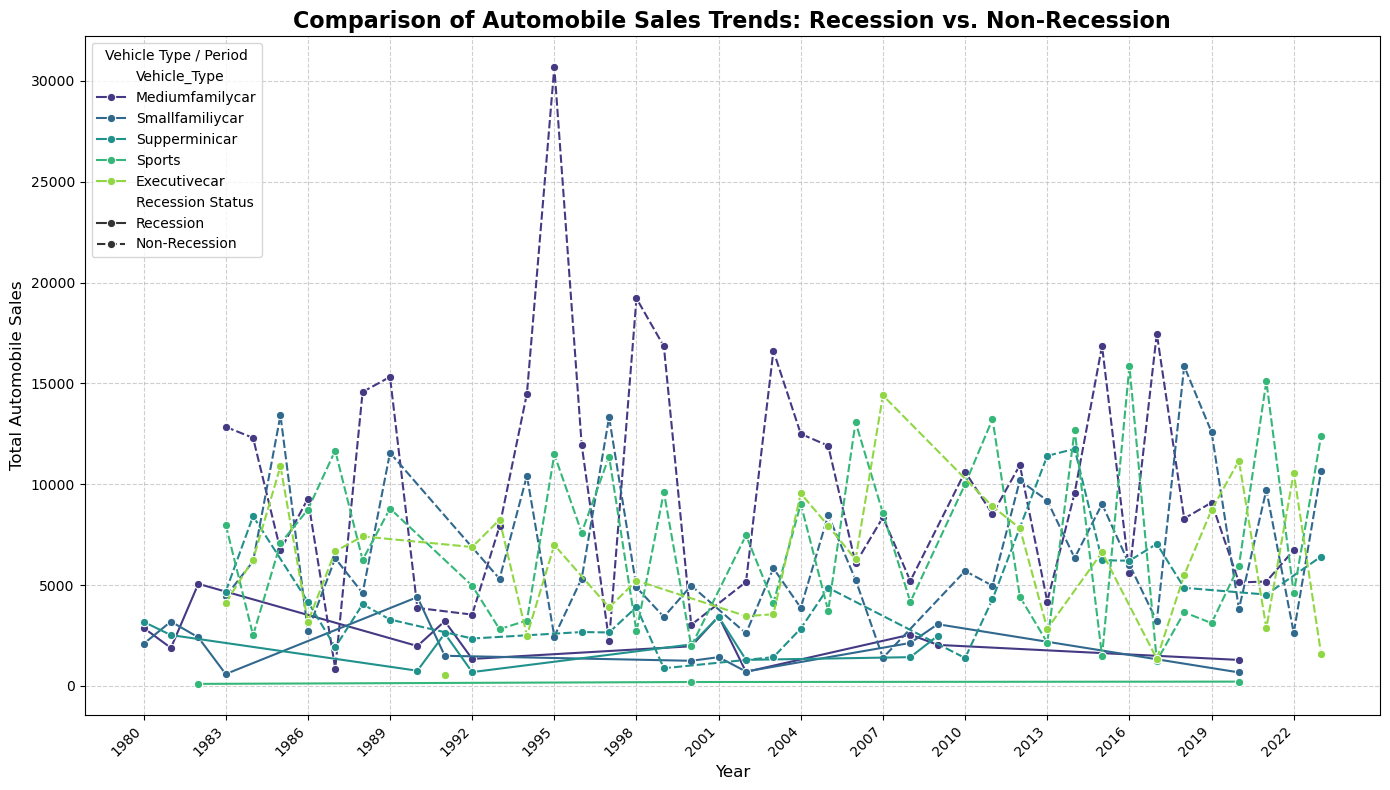

In [8]:
# 1. Group the data by Year, Vehicle_Type, and Recession status.
# We use the mean here to get a comparable measure across months within the same year/type.
sales_comparison = df.groupby(['Year', 'Vehicle_Type', 'Recession'])['Automobile_Sales'].sum().reset_index()

# Convert the Recession status (0 or 1) to a readable category for the legend
sales_comparison['Recession Status'] = sales_comparison['Recession'].apply(lambda x: 'Recession' if x == 1 else 'Non-Recession')

# --- Plotting ---

plt.figure(figsize=(14, 8))

# Create the multi-line chart using seaborn
# Use 'Vehicle_Type' as hue, and 'Recession Status' as style for distinct lines
sns.lineplot(
    data=sales_comparison,
    x='Year',
    y='Automobile_Sales',
    hue='Vehicle_Type',
    style='Recession Status', # This creates two different line styles (solid/dashed) for each type
    marker='o',
    errorbar=None, # Use None since we already summed/grouped the data
    palette='viridis'
)

# Add Title and Labels
plt.title('Comparison of Automobile Sales Trends: Recession vs. Non-Recession', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Automobile Sales', fontsize=12)

# Set x-ticks to display all years clearly
plt.xticks(sales_comparison['Year'].unique()[::3], rotation=45, ha='right') # Display every 3rd year for readability

plt.legend(title='Vehicle Type / Period', loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show() # or plt.savefig('sales_comparison_trend.png')

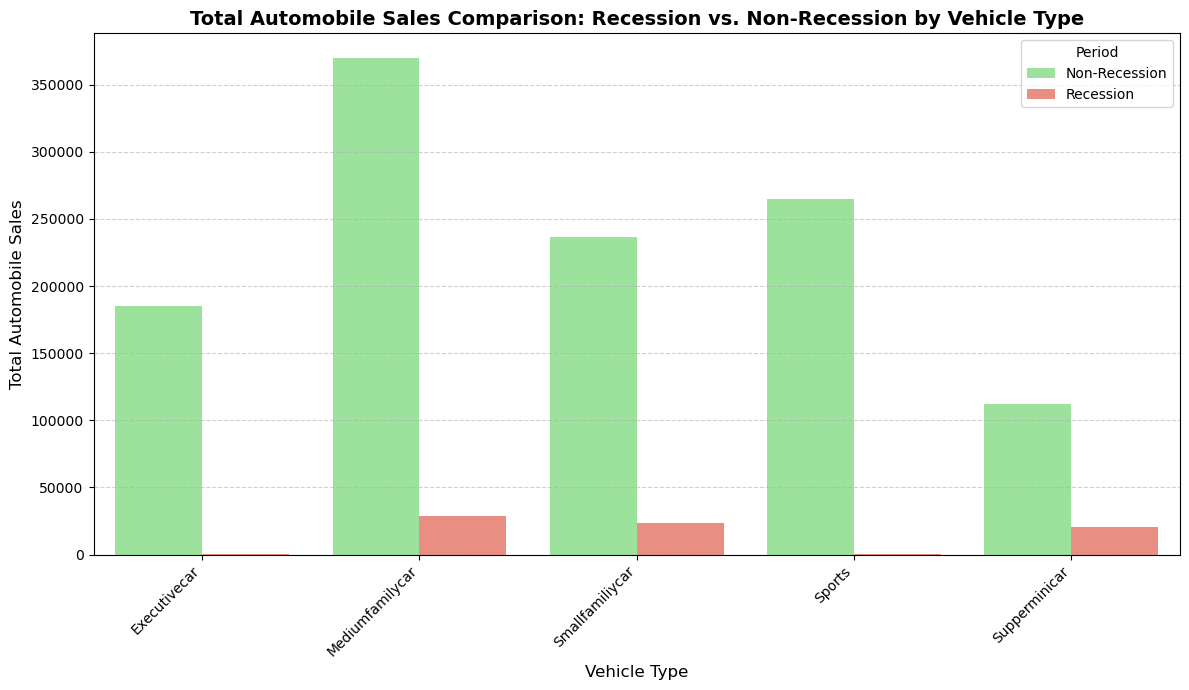

In [11]:

# 1. Prepare Data: Group by Recession and Vehicle_Type and calculate Total Sales
comparison_data = df.groupby(['Recession', 'Vehicle_Type'])['Automobile_Sales'].sum().reset_index()

# 2. Add a descriptive column for the plot's hue/grouping
comparison_data['Recession Status'] = comparison_data['Recession'].map({1: 'Recession', 0: 'Non-Recession'})

# --- Plotting Grouped Bar Chart ---

plt.figure(figsize=(12, 7))

# Create the grouped bar chart using seaborn
sns.barplot(
    data=comparison_data,
    x='Vehicle_Type',
    y='Automobile_Sales',
    hue='Recession Status',
    palette={'Recession': 'salmon', 'Non-Recession': 'lightgreen'} # Use contrasting colors
)

# Add Title and Labels
plt.title('Total Automobile Sales Comparison: Recession vs. Non-Recession by Vehicle Type', fontsize=14, fontweight='bold')
plt.xlabel('Vehicle Type', fontsize=12)
plt.ylabel('Total Automobile Sales', fontsize=12)
plt.xticks(rotation=45, ha='right') # Rotate x-labels for better fit
plt.legend(title='Period')
plt.grid(axis='y', linestyle='--', alpha=0.6) # Add horizontal grid lines
plt.tight_layout()
plt.show()

TASK 1.4: Use sub plotting to compare the variations in GDP during recession and non-recession period by developing line plots for each period.

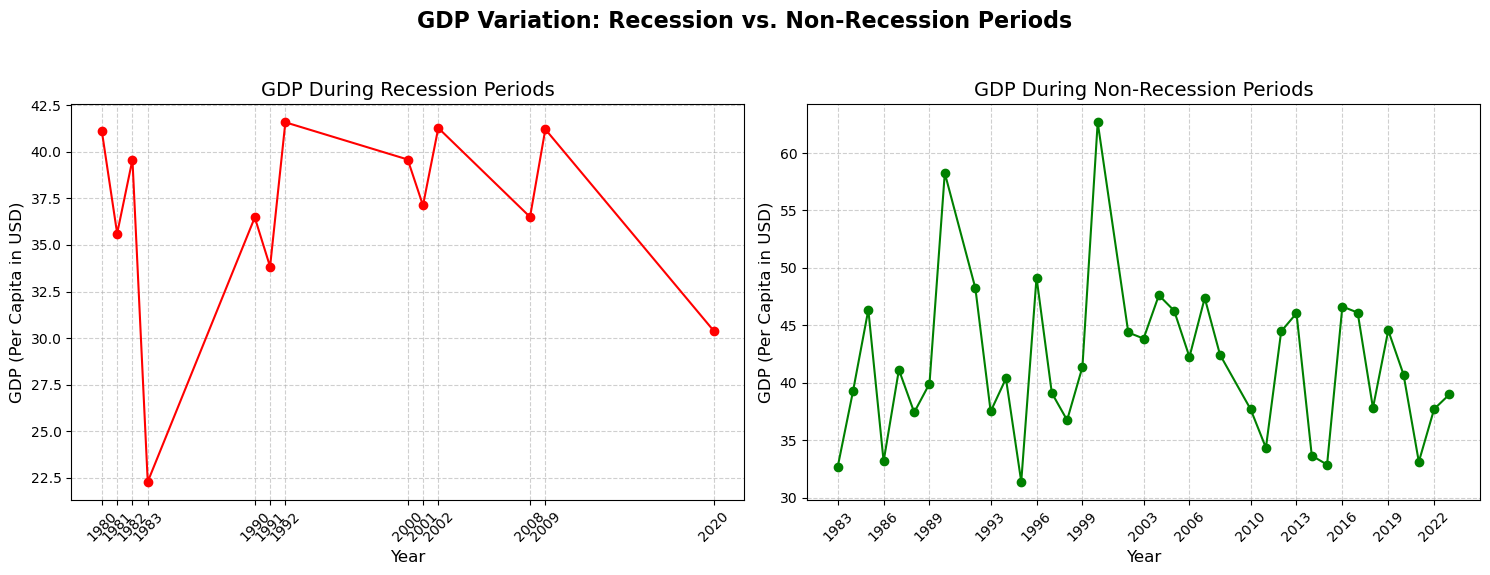

In [12]:
# Filter the data for recession and non-recession periods
recession_data = df[df['Recession'] == 1]
non_recession_data = df[df['Recession'] == 0]

# Group by Year and calculate the mean GDP for each period
recession_gdp = recession_data.groupby('Year')['GDP'].mean().reset_index()
non_recession_gdp = non_recession_data.groupby('Year')['GDP'].mean().reset_index()

# --- Plotting Subplots ---

# Create a figure with two subplots side by side (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('GDP Variation: Recession vs. Non-Recession Periods', fontsize=16, fontweight='bold')

# Plot 1 (Left): GDP During Recession Periods
axes[0].plot(recession_gdp['Year'], recession_gdp['GDP'], marker='o', color='red', linestyle='-')
axes[0].set_title('GDP During Recession Periods', fontsize=14)
axes[0].set_xlabel('Year', fontsize=12)
axes[0].set_ylabel('GDP (Per Capita in USD)', fontsize=12)
axes[0].grid(True, linestyle='--', alpha=0.6)
axes[0].tick_params(axis='x', rotation=45)
axes[0].set_xticks(recession_gdp['Year'].unique())

# Plot 2 (Right): GDP During Non-Recession Periods
axes[1].plot(non_recession_gdp['Year'], non_recession_gdp['GDP'], marker='o', color='green', linestyle='-')
axes[1].set_title('GDP During Non-Recession Periods', fontsize=14)
axes[1].set_xlabel('Year', fontsize=12)
axes[1].set_ylabel('GDP (Per Capita in USD)', fontsize=12)
axes[1].grid(True, linestyle='--', alpha=0.6)
axes[1].tick_params(axis='x', rotation=45)
axes[1].set_xticks(non_recession_gdp['Year'].unique()[::3]) # Display every 3rd year for clarity

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show() # or plt.savefig('gdp_variation_subplots.png')

TASK 1.5: Develop a Bubble plot for displaying the impact of seasonality on Automobile Sales.


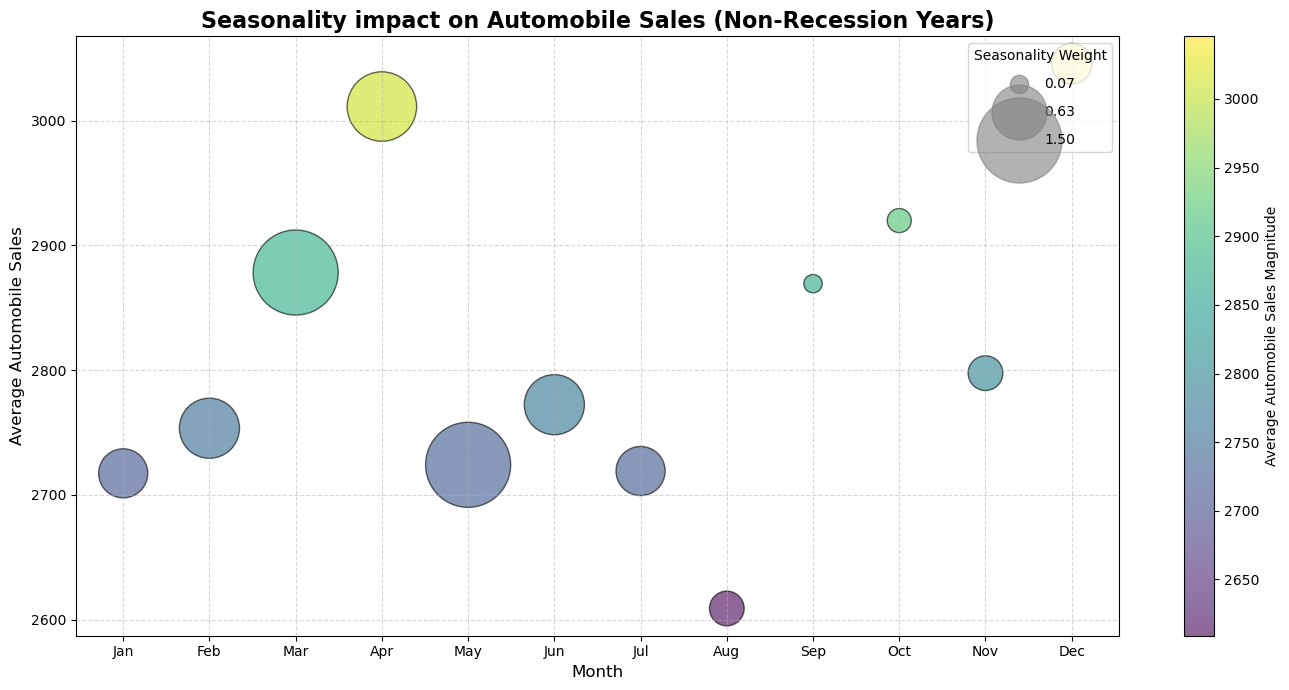

In [14]:
# 1. Filter the data for non-recession years
non_recession_data = df[df['Recession'] == 0]

# 2. Group the data by Month and calculate the mean sales (Y-axis) and mean seasonality weight (Bubble size)
seasonal_data = non_recession_data.groupby('Month')[['Automobile_Sales', 'Seasonality_Weight']].mean().reset_index()

# Define the order of months for clear X-axis plotting
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
seasonal_data['Month'] = pd.Categorical(seasonal_data['Month'], categories=month_order, ordered=True)
seasonal_data = seasonal_data.sort_values('Month')

# 3. Scale the Seasonality_Weight for bubble size (s). We use a scaling factor for visibility.
scaling_factor = 2500
seasonal_data['Bubble_Size'] = seasonal_data['Seasonality_Weight'] * scaling_factor

# --- Plotting Bubble Plot ---

plt.figure(figsize=(14, 7))

# Create the scatter plot where 's' determines the bubble size (Seasonality_Weight)
scatter = plt.scatter(
    x=seasonal_data['Month'],
    y=seasonal_data['Automobile_Sales'],
    s=seasonal_data['Bubble_Size'],
    alpha=0.6,
    c=seasonal_data['Automobile_Sales'], # Use sales value for color gradient
    cmap='viridis',
    edgecolors='k', 
    linewidth=1
)

# Add Title and Labels
plt.title('Seasonality impact on Automobile Sales (Non-Recession Years)', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Automobile Sales', fontsize=12)

# Add color bar
plt.colorbar(scatter, label='Average Automobile Sales Magnitude')

plt.grid(True, linestyle='--', alpha=0.5)

# Create a custom legend for bubble size (Seasonality Weight)
legend_weights = [seasonal_data['Seasonality_Weight'].min(), seasonal_data['Seasonality_Weight'].mean(), seasonal_data['Seasonality_Weight'].max()]
for weight in legend_weights:
    closest_size = weight * scaling_factor
    plt.scatter([], [], s=closest_size, label=f'{weight:.2f}', color='gray', alpha=0.6)

plt.legend(scatterpoints=1, frameon=True, labelspacing=1, title='Seasonality Weight', loc='upper right')

plt.tight_layout()
plt.show()

TASK 1.6: Use the functionality of Matplotlib to develop a scatter plot to identify the correlation between average vehicle price relate to the sales volume during recessions

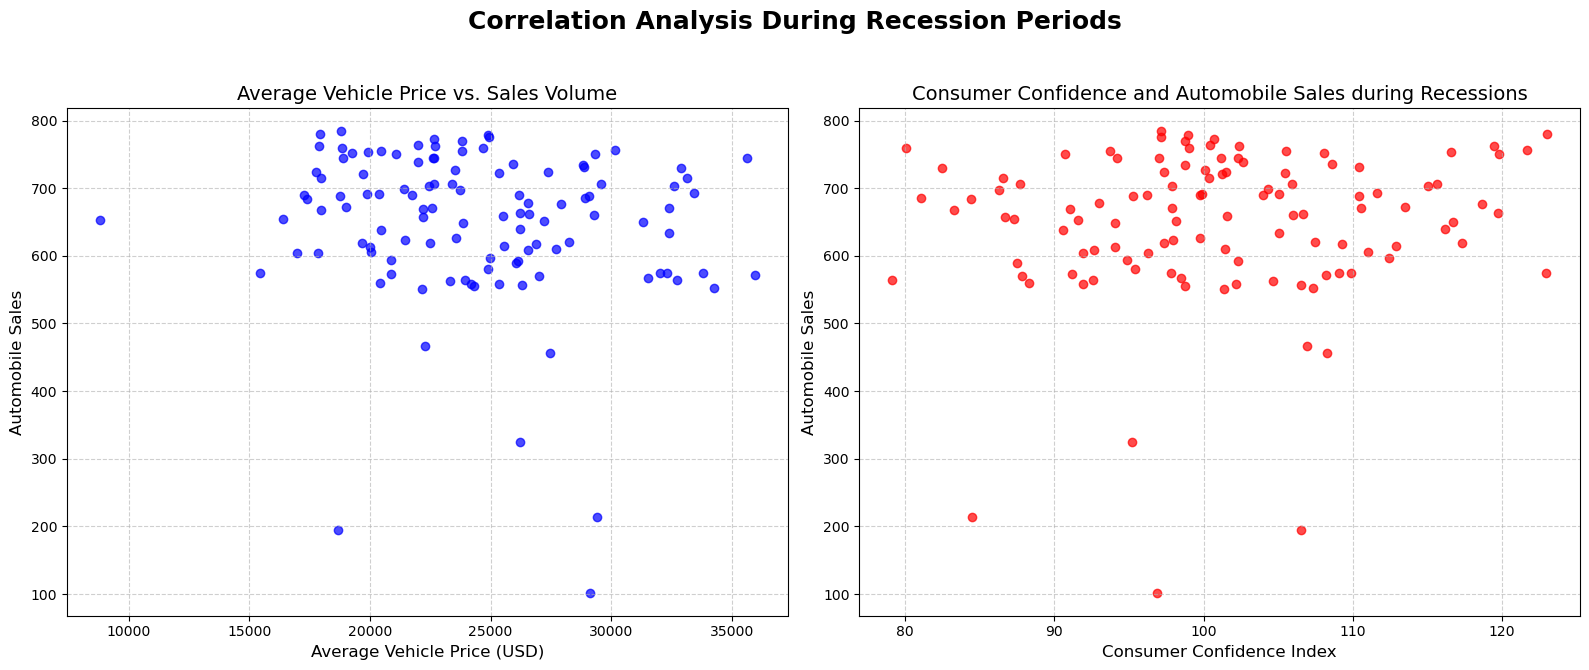

In [15]:
# Create a figure with two subplots side by side (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(16, 7))
fig.suptitle('Correlation Analysis During Recession Periods', fontsize=18, fontweight='bold')

# Plot 1 (Left): Price vs. Sales
axes[0].scatter(recession_data['Price'], recession_data['Automobile_Sales'], color='blue', alpha=0.7)
axes[0].set_title('Average Vehicle Price vs. Sales Volume', fontsize=14)
axes[0].set_xlabel('Average Vehicle Price (USD)', fontsize=12)
axes[0].set_ylabel('Automobile Sales', fontsize=12)
axes[0].grid(True, linestyle='--', alpha=0.6)

# Plot 2 (Right): Consumer Confidence vs. Sales (Using your requested title)
axes[1].scatter(recession_data['Consumer_Confidence'], recession_data['Automobile_Sales'], color='red', alpha=0.7)
axes[1].set_title('Consumer Confidence and Automobile Sales during Recessions', fontsize=14)
axes[1].set_xlabel('Consumer Confidence Index', fontsize=12)
axes[1].set_ylabel('Automobile Sales', fontsize=12)
axes[1].grid(True, linestyle='--', alpha=0.6)

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout for suptitle
plt.show() # or plt.savefig('recession_correlation_plots.png')

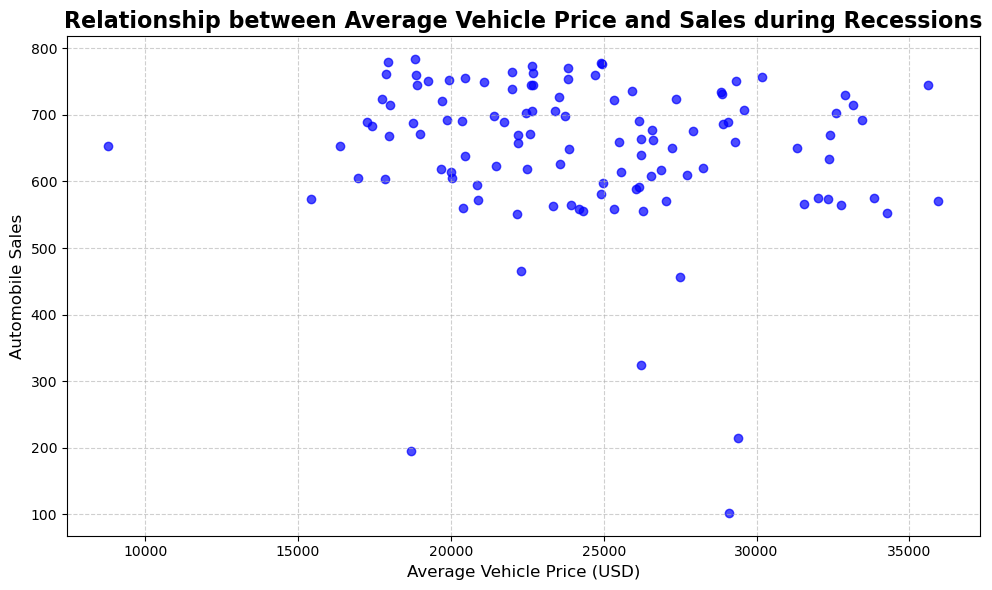

In [16]:
# 1. Filter the data for recession periods only
recession_data = df[df['Recession'] == 1]

# --- Plotting the Single Scatter Plot ---
plt.figure(figsize=(10, 6))

# Plot Price vs. Sales
plt.scatter(recession_data['Price'], recession_data['Automobile_Sales'], color='blue', alpha=0.7)

# Set the requested title
plt.title('Relationship between Average Vehicle Price and Sales during Recessions', fontsize=16, fontweight='bold')
plt.xlabel('Average Vehicle Price (USD)', fontsize=12)
plt.ylabel('Automobile Sales', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

TASK 1.7: Create a pie chart to display the portion of advertising expenditure of XYZAutomotives during recession and non-recession periods.

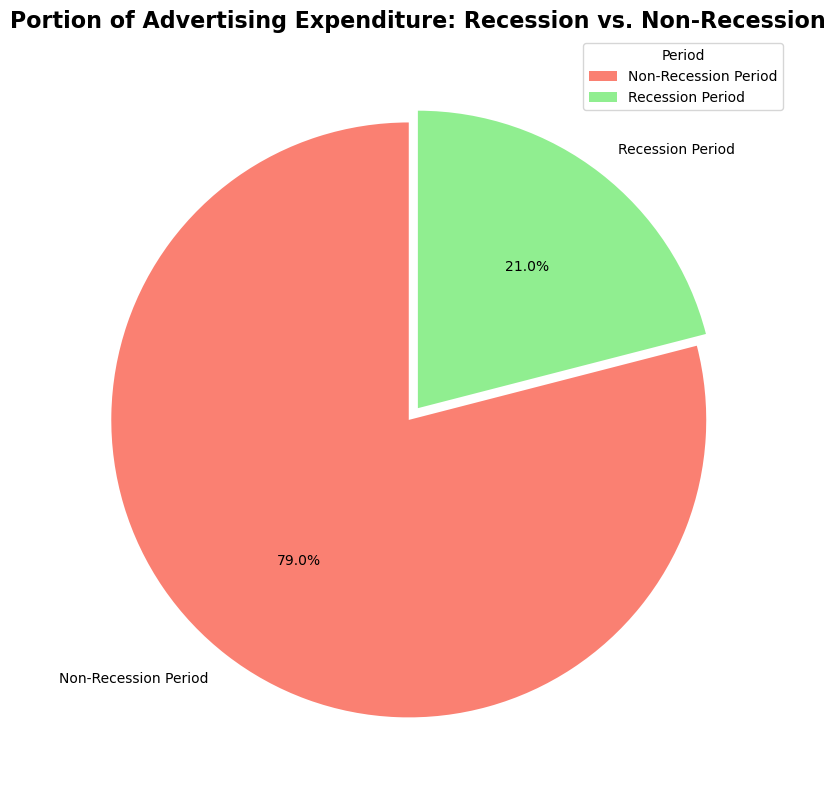

In [17]:
# 1. Group the data by Recession status and calculate the total Advertising_Expenditure
ad_expenditure = df.groupby('Recession')['Advertising_Expenditure'].sum().reset_index()

# 2. Create descriptive labels for the pie chart slices
ad_expenditure['Period'] = ad_expenditure['Recession'].map({1: 'Recession Period', 0: 'Non-Recession Period'})

# --- Plotting Pie Chart ---

plt.figure(figsize=(8, 8))

# Create the pie chart
plt.pie(
    ad_expenditure['Advertising_Expenditure'],
    labels=ad_expenditure['Period'],
    autopct='%1.1f%%', # Display percentage
    startangle=90,     
    colors=['salmon', 'lightgreen'],
    explode=[0.05, 0]  # Separate the Recession slice
)

# Set the title
plt.title('Portion of Advertising Expenditure: Recession vs. Non-Recession', fontsize=16, fontweight='bold')

# Add legend
plt.legend(title="Period", loc="best")

plt.tight_layout()
plt.show() # or plt.savefig('ad_expenditure_pie_chart.png')

TASK 1.8: Develop a pie chart to display the total Advertisement expenditure for each vehicle type during recession period.

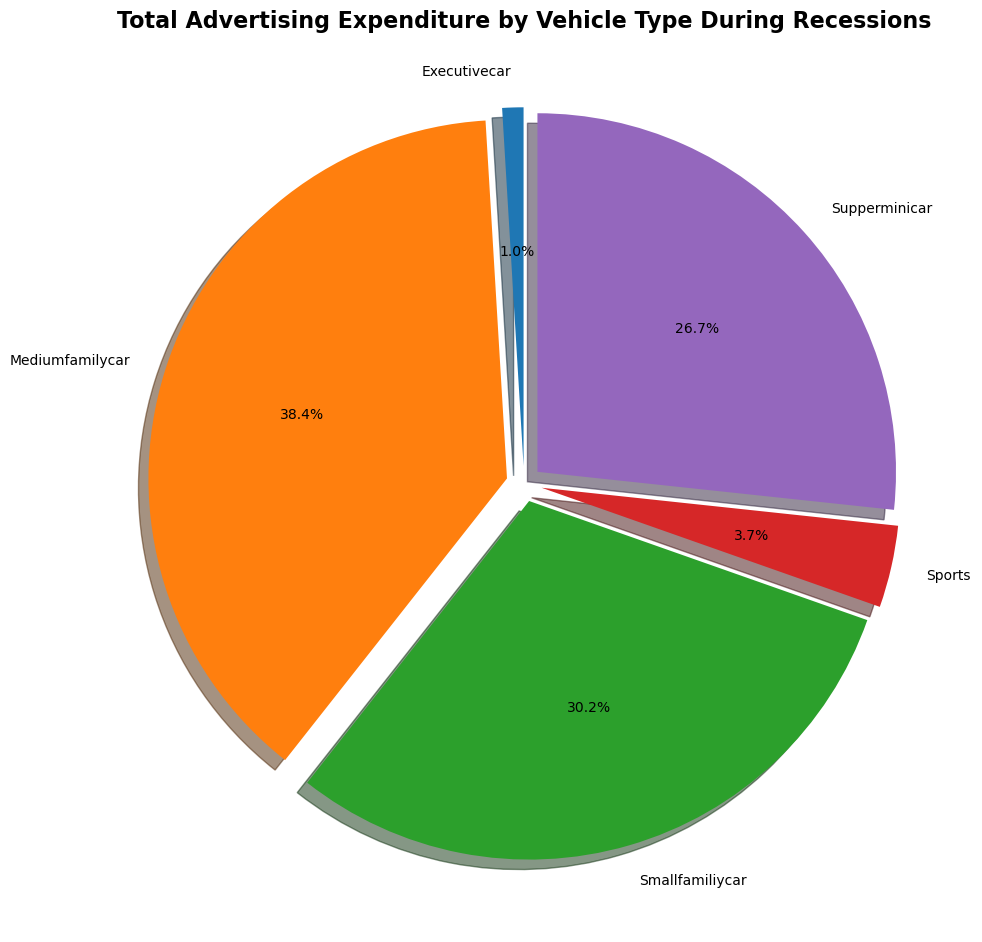

In [18]:
# 1. Filter the data for recession periods only
recession_data = df[df['Recession'] == 1]

# 2. Group by Vehicle_Type and calculate the total Advertising_Expenditure
ad_expenditure_by_type = recession_data.groupby('Vehicle_Type')['Advertising_Expenditure'].sum().reset_index()

# --- Plotting Pie Chart ---

plt.figure(figsize=(10, 10))

# Get Vehicle_Type labels
labels = ad_expenditure_by_type['Vehicle_Type']

# Create the pie chart
plt.pie(
    ad_expenditure_by_type['Advertising_Expenditure'],
    labels=labels,
    autopct='%1.1f%%', # Display percentage
    startangle=90,     
    shadow=True,
    explode=[0.05] * len(labels) # Separate all slices for better readability
)

# Set the title
plt.title('Total Advertising Expenditure by Vehicle Type During Recessions', fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show() # or plt.savefig('ad_expenditure_by_type_pie_chart.png')

TASK 1.9: Develop a lineplot to analyse the effect of the unemployment rate on vehicle type and sales during the Recession Period.

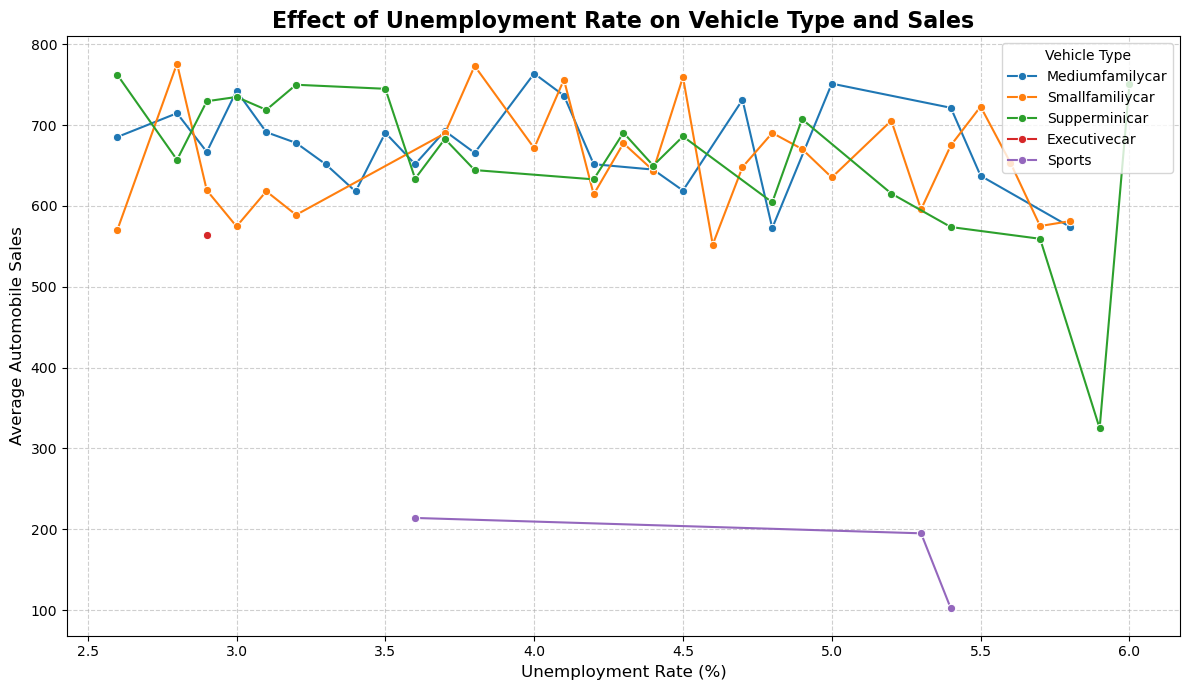

In [21]:
# 1. Filter the data for recession periods only
recession_data = df[df['Recession'] == 1]

# 2. Group by the CORRECT column name: 'unemployment_rate'
unemployment_sales_analysis = recession_data.groupby(['unemployment_rate', 'Vehicle_Type'])['Automobile_Sales'].mean().reset_index()

# --- Plotting Line Plot ---

plt.figure(figsize=(12, 7))

# Create the multi-line chart using seaborn
sns.lineplot(
    data=unemployment_sales_analysis,
    x='unemployment_rate',  # Use the correct column name here
    y='Automobile_Sales',
    hue='Vehicle_Type',
    marker='o',
    dashes=False,
    errorbar=None
)

# Set the requested title and labels
plt.title('Effect of Unemployment Rate on Vehicle Type and Sales', fontsize=16, fontweight='bold')
plt.xlabel('Unemployment Rate (%)', fontsize=12)
plt.ylabel('Average Automobile Sales', fontsize=12)
plt.legend(title='Vehicle Type', loc='upper right')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()